In [ ]:
import random
import numpy as np
import pandas as pd

from GA.BayesianOptimization import BayesianOptimization
from GA.HillClimbAlgorithm import HillClimbAlgorithm
from GA.SimulatedAnnealing import SimulatedAnnealing

from function_modules.function_module import *

In [ ]:
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'seed': 0,
}
target_expressions = [0, 0.5, 1]

### Testing Bayesian Optimization
---

In [11]:
bo_results = []
for target_expression in target_expressions:
    bo = BayesianOptimization(
        **kwargs,
        target_expression=target_expression,
    )
    best_sequence, best_prediction, best_error = bo.run()

    print(f'Target: {target_expression:.3f} | Prediction: {best_prediction:.3f} | Error: {best_error:.3f}')
    bo_results.append(bo.prediction_history)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Target: 0.000 | Prediction: 0.237 | Error: 0.237


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Target: 0.500 | Prediction: 0.504 | Error: 0.004


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Target: 1.000 | Prediction: 0.610 | Error: 0.390


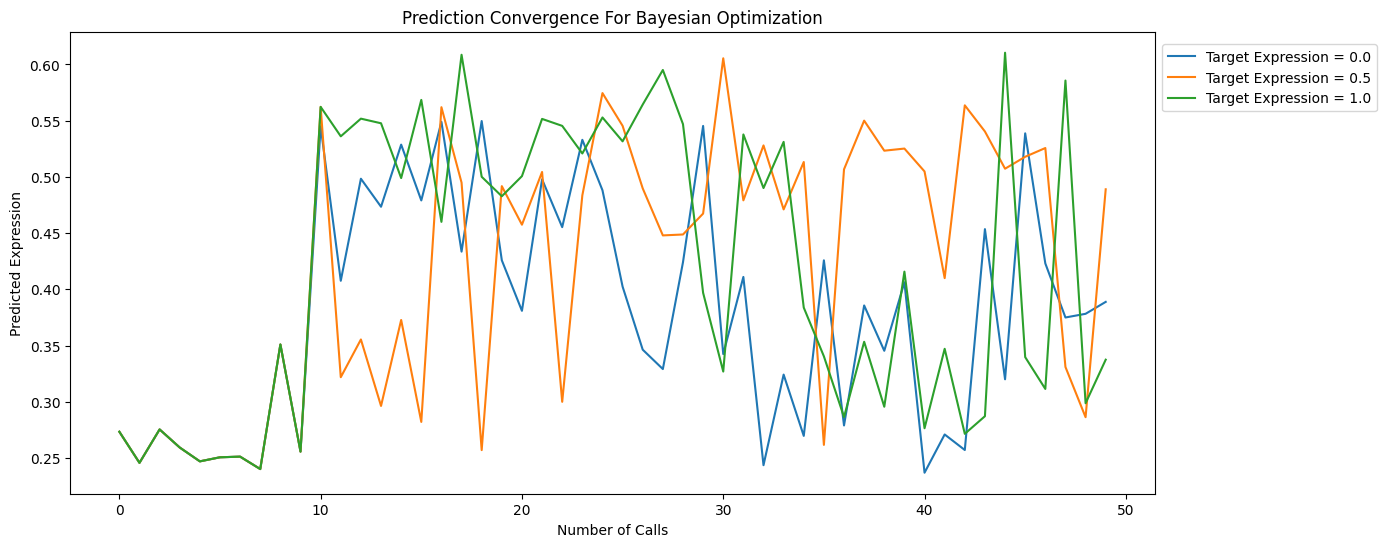

In [12]:
bo_df = pd.DataFrame(bo_results)
bo_df.index = target_expressions

fig, ax = plt.subplots(figsize=(14, 6))

for label in bo_df.index: 
    ax.plot(bo_df.columns, bo_df.loc[label], label=f'Target Expression = {label}')

ax.set_xlabel('Number of Calls')
ax.set_ylabel('Predicted Expression')
ax.set_title('Prediction Convergence For Bayesian Optimization')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

plt.show()


### Testing Hill Climb Algorithm

This algorithm iteratively finds the optimal single nucleotide mutation, then iterates until it reaches a local optimal.

---

#### Runtime Analysis

* n = Number of masked positions.
* I = Maximum number of iterations.
* k = Number of alternative nucleotides per position (3).

The best case runtime is O(n), where the target expression is reached in the first iteration.
The worst case runtime is O(I). 
If I is unbounded, The worst case runtime is O(4**(n-1))., where all possible sequences are evaluated.

Because the CNN evaluates nucleotide interactions, the optimal nucleotide at each position is 
dependent on the other nucleotides. This can result in "reversals," where a previous mutation 
is undone in later generations.

1. AAAA
2. TAAA
3. TAAT
4. AAAT 

Here, seq[0] initially changes to 'T'. Later, seq[3] changes to 'T', which alters the optimal 
choice for seq[0], causing it to revert back to 'A'. This occurs because the CNN evaluates the 
sequence holistically rather than treating positions independently.

Due to these dependencies, positions may change multiple times before convergence. While the 
number of changes per position can depend on interactions with the rest of the sequence, the 
total runtime remains bounded by O(I * m), where I depends on how often changes propagate.
Unbounded, the hypothetical maximum number of changes for each position is equal to the number
of possible combinations of all other positions, O(4**(n-1)).

In [ ]:
hca_results = []
for target_expression in target_expressions:
    hca = HillClimbAlgorithm(
        **kwargs,
        target_expression=target_expression,
    )
    best_sequence, best_prediction, best_error = hca.run()

    print(f'Target: {target_expression:.3f} | Prediction: {best_prediction:.3f} | Error: {best_error:.3f}')
    hca_results.append(hca.prediction_history)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Target: 0.000 | Prediction: 0.138 | Error: 0.138
Target: 0.500 | Prediction: 0.499 | Error: 0.001
Target: 1.000 | Prediction: 0.818 | Error: 0.182


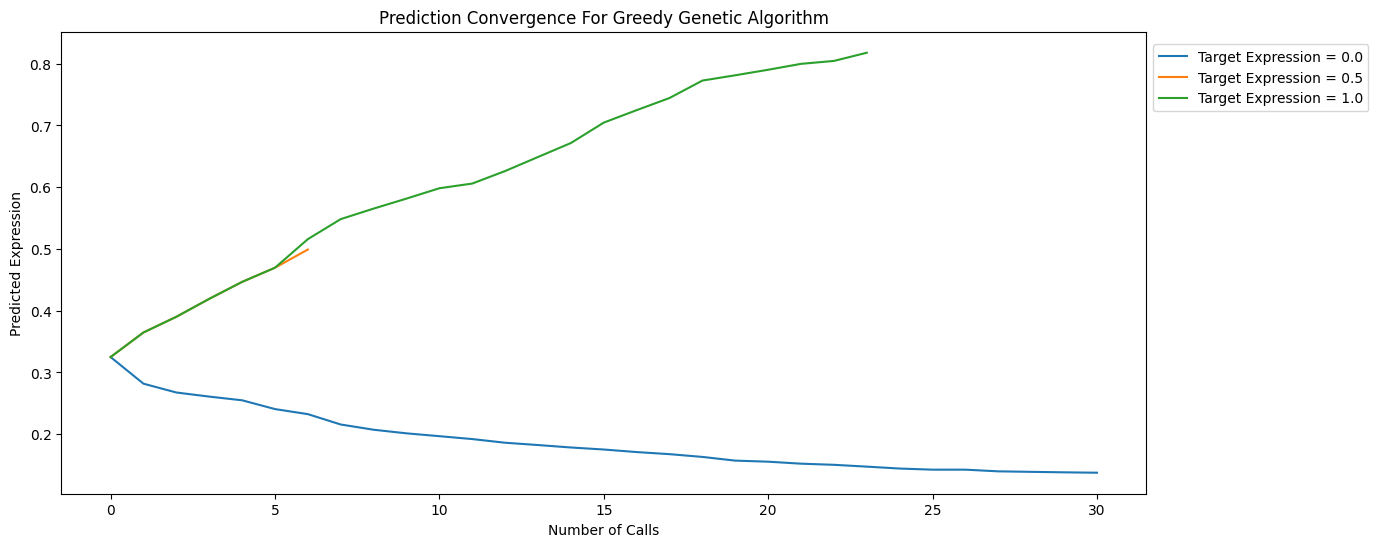

In [ ]:
hca_df = pd.DataFrame(hca_results)
hca_df.index = target_expressions

fig, ax = plt.subplots(figsize=(14, 6))

for label in hca_df.index: 
    ax.plot(hca_df.columns, hca_df.loc[label], label=f'Target Expression = {label}')

ax.set_xlabel('Number of Calls')
ax.set_ylabel('Predicted Expression')
ax.set_title('Prediction Convergence For Greedy Genetic Algorithm')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

plt.show()

### Testing Simulated Annealing
---

In [9]:
sa_results = []
for target_expression in target_expressions:
    sa = SimulatedAnnealing(
        **kwargs,
        target_expression=target_expression,
    )
    best_sequence, best_prediction, best_error = sa.run()

    print(f'Target: {target_expression:.3f} | Prediction: {best_prediction:.3f} | Error: {best_error:.3f}')
    sa_results.append(sa.prediction_history)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Target: 0.000 | Prediction: 0.162 | Error: 0.162
Target: 0.500 | Prediction: 0.500 | Error: 0.000
Target: 1.000 | Prediction: 0.732 | Error: 0.268


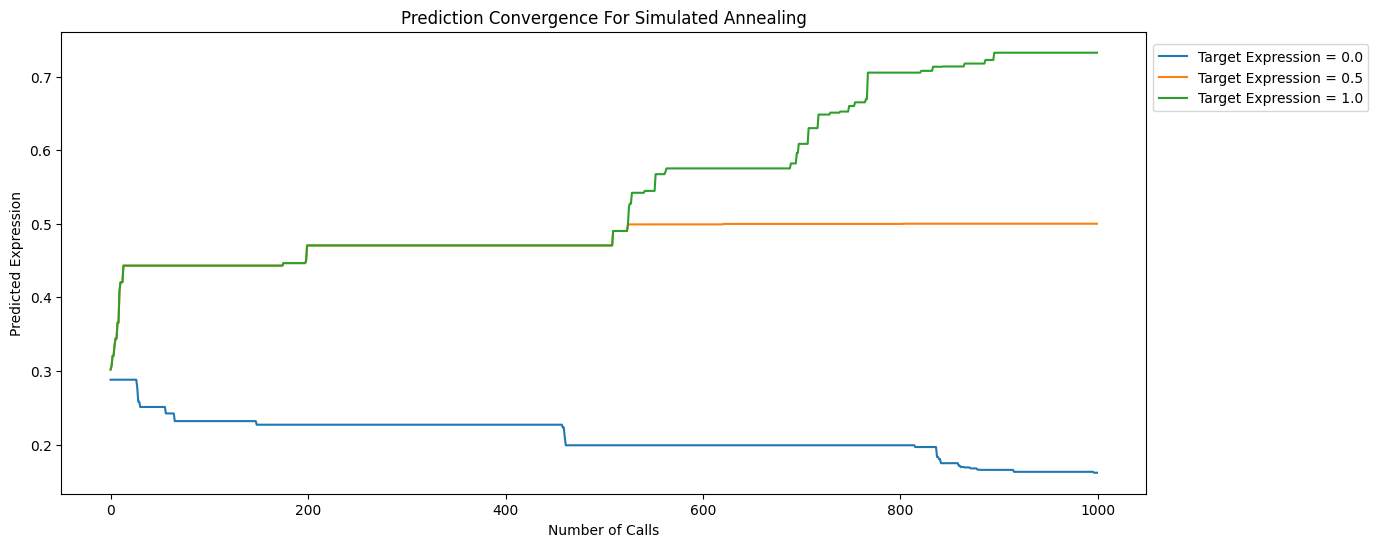

In [10]:
sa_df = pd.DataFrame(sa_results)
sa_df.index = target_expressions

fig, ax = plt.subplots(figsize=(14, 6))

for label in sa_df.index: 
    ax.plot(sa_df.columns, sa_df.loc[label], label=f'Target Expression = {label}')

ax.set_xlabel('Number of Calls')
ax.set_ylabel('Predicted Expression')
ax.set_title('Prediction Convergence For Simulated Annealing')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

plt.show()